In [10]:
#create quantile seeds
#[(4, 'quartiles'), (10, 'deciles'), (100, 'percentiles'), (1000, 'permilles')]

from pathlib import Path

for kind in [(1000, 'permilles')]:
    with open(Path('geih') / 'seeds' / f'seed_{kind[1]}.csv', 'w') as f:
        f.write('quantile,percentage\n')
        for i in range(1, kind[0]):
            f.write(f'{i},{i / float(kind[0])}\n')


In [9]:
# for a list of files in a directory that match a pattern
# open a TSV file and iterate over the rows
# Path: raw_files/base_income.tsv
# skip the headers
# write the second column onwards the number of times specified in the first column to a new file
# Path: raw_files/base_income_expanded.tsv

from pathlib import Path
import csv

for file in Path('raw_files').glob('base_income*.tsv'):
    with open(file, 'r') as f:
        reader = csv.reader(f, delimiter='\t')
        next(reader)
        for row in reader:
            with open(Path('raw_files') / 'expanded' / f'{file.stem}_expanded.tsv', 'a') as f:
                for i in range(int(row[0])):
                    f.write('\t'.join(row[1:]) + '\n')


average=1432723.9936168254 std_dev=2223211.1801345176 upper_bound=8500000.0


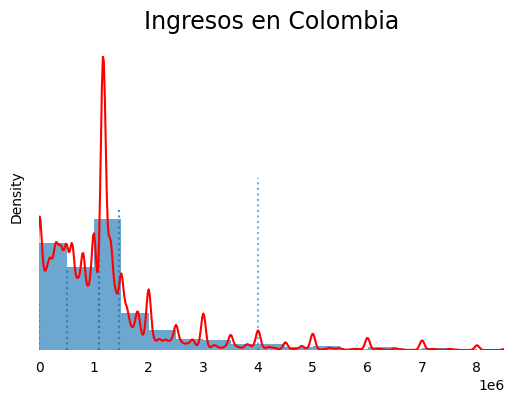

In [6]:
# plot the income distribution
# Path: raw_files/expanded/base_income_expanded.tsv

import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('raw_files/expanded/base_income_dept_zone_expanded.tsv', sep='\t', header=None)
df.columns = ['dept', 'zone', 'income']
#df.query('dept == 11 and zone == 1', inplace=True)
average = df['income'].mean()
std_dev = df['income'].std()
bin_width = 500000
upper_bound = round((average + 3 * std_dev) * 2, -6) / 2 + bin_width
print(f'{average=} {std_dev=} {upper_bound=}')
fig, ax = plt.subplots(figsize = (6,4))
income = df.query(f'income < {upper_bound + bin_width}')['income']
quant_5, quant_25, quant_50, quant_75, quant_95 = income.quantile(0.05), income.quantile(0.25), income.quantile(0.5), income.quantile(0.75), income.quantile(0.95)
quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")
ax.set_xlabel("Ingresos (millones de pesos)")
ax.set_xlim(0, upper_bound)
ax.set_yticklabels([])
ax.set_ylabel("")
ax.grid(False)
ax.set_title("Ingresos en Colombia", size = 17, pad = 10)
    # Remove ticks and spines
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)
income.plot(kind = "hist", density = True, alpha = 0.65, bins = range(0, int(upper_bound), bin_width))
income.plot(kind = "kde", color = "red")
plt.show()

